# Examples of calculating $\Delta _{\mathrm{r}}G'^\circ$ at given condition

In [1]:
from group_contribution import group_contribution

In [2]:
gc = group_contribution()

Calculated 4168 dGr0s with 814 compounds as training data


In [3]:
#the input reaction can be in form of reaction formula
#the compound id and name can be found "data/cid_names.xlsx", there will be a mapping between the current cid and bigg id in the future
#output in unit J/mol
example_rxn_formula = ['2 CHB_16761 = CHB_15422 + CHB_16027', 'CHB_35418 = CHB_15361 + CHB_63153'] #adenylate kinase, N-acetylneuraminate lyase
gc.calc_dGr(example_rxn_formula, pH = 7, IS = 0.25, T = 310.15)

array([ 2581.96207084,  6563.06293679])

In [ ]:
#the input reaction can also be in form of dictionary
example_rxn_dict = [{'CHB_15422':1, 'CHB_16027': 1, 'CHB_16761':-2}, {'CHB_35418': -1, 'CHB_15361': 1, 'CHB_63153':1}]
gc.calc_dGr(example_rxn_formula, pH = 7, IS = 0.25, T = 298.15)

array([ 1246.34866838,  8297.20569514])

In [ ]:
example_rxn_formula = ['CHB_16001 + CHB_16761 = 3pg + CHB_15422']
#in cases where the compound is not in database, the molstring of the compound (e.g. smiles form) need to be provided
gc.calc_dGr(example_rxn_formula, pH = 7, IS = 0.25, T = 298.15,\
cpd_molstring_dict={'3pg': 'O[C@H](COP(O)(O)=O)C(O)=O'})

Calculated pKas and protonation states for 3pg


# Examples on optimizing pK using $\Delta _{\mathrm{r}}G'^\circ$ data

In [1]:
from pK_optimization import pK_optimization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_comparisons(Mg_conc_to_plot, no_Mg_corr_results, original_Mg_corr_results, optimized_Mg_corr_results, title = 'ADK data'):
    '''
    plot dGr0 as a function of pKMg (Mg concentration), first without metal correction, then metal correction
    with original pKMg values, and metal correction with optimized pKMg values; the dGr_standard values are calculated
    from pK_optimization module
    '''
    no_Mg_corr_results = [val/1000 for val in no_Mg_corr_results]
    original_Mg_corr_results = [val/1000 for val in original_Mg_corr_results]
    optimized_Mg_corr_results = [val/1000 for val in optimized_Mg_corr_results]
    y_min = min(no_Mg_corr_results + original_Mg_corr_results + optimized_Mg_corr_results)
    y_max = max(no_Mg_corr_results + original_Mg_corr_results + optimized_Mg_corr_results)
    y_lower_lim = (y_min - abs(y_min) * 0.01); y_upper_lim = (y_max + abs(y_max) * 0.01)
    fig = plt.figure(figsize=(20, 13))
    ax1 = fig.add_subplot(221)
    ax1.scatter(Mg_conc_to_plot, no_Mg_corr_results, s= 110, color = 'r', marker = 'x', label = 'no correction on Mg')
    ax1.scatter(Mg_conc_to_plot, original_Mg_corr_results, s= 100, color = 'b',  marker = 's', label = 'correction on Mg using data')
    ax1.scatter(Mg_conc_to_plot, optimized_Mg_corr_results, s= 170, color = 'g',  marker = '*', label = 'correction on Mg using optimized data')
    ax1.set_title(title, size = 30)
    ax1.set_xlabel("pMg in measured Keq data",size = 20)
    ax1.set_ylabel("$\Delta _{\mathrm{r}}G^\circ$ (kJ/mol)", size = 20)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.ylim([y_lower_lim,y_upper_lim])
    
def find_pKMg_sids(cid):
    '''
    find species ids with Mg binding constants of a compound
    '''
    compounds_data_dict = pK_optimize.TECRDB_compounds_data_dict
    return [sid for sid in compounds_data_dict.keys() if compounds_data_dict[sid]['compound_id'] == cid and 'Mg' in sid]

In [3]:
pK_optimize = pK_optimization()

In [4]:
#data from adenylate kinase reaction
ADK_list = ['Keq_3885','Keq_3886','Keq_3887','Keq_3888','Keq_3889','Keq_3890','Keq_3891','Keq_3892','Keq_3893','Keq_3894','Keq_3895','Keq_3896','Keq_3897','Keq_3898','Keq_3926', 'Keq_3927', 'Keq_3936', 'Keq_3937', 'Keq_3938', 'Keq_3939','Keq_3944', 'Keq_3945', 'Keq_3946', 'Keq_3947', 'Keq_3948', 'Keq_3949', 'Keq_3956', 'Keq_3957', 'Keq_3958', 'Keq_3959', 'Keq_3960', 'Keq_3961', 'Keq_3962', 'Keq_3963']
#data from arginine kinase reaction
AK_list = ['Keq_4249', 'Keq_4252', 'Keq_4253', 'Keq_4254', 'Keq_4255', 'Keq_4256', 'Keq_4257', 'Keq_4258', 'Keq_4259', 'Keq_4260', 'Keq_4261', 'Keq_4262', 'Keq_4263', 'Keq_4264', 'Keq_4265', 'Keq_4266', 'Keq_4267', 'Keq_4268', 'Keq_4269', 'Keq_4270', 'Keq_4271']

In [5]:
pK_optimize.setup_vars_and_eqns(ADK_list, ADK_list + AK_list, [sid for sid in pK_optimize.common_sids2write_sym if 'Mg' in sid])

Writing 55 dGr0 equations


In [6]:
pK_optimize.setup_optm_params()
pK_optimize.run_optimization(pK_optimize.var_vector_to_use)

Elapsed time 0.157000 seconds for approximate optimization
Elapsed time 0.316000 seconds for LMA optimization


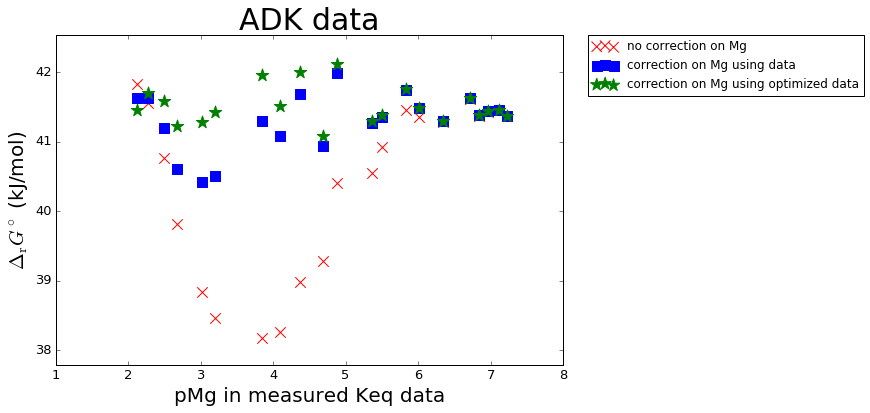

In [7]:
pK_optimize.compare_optm_results(ADK_list)
plot_comparisons(pK_optimize.updated_pMg2plot, pK_optimize.updated_dGr0_no_Mg_corr, \
pK_optimize.updated_dGr0_w_original_val, pK_optimize.updated_dGr0_w_optimized_val, title = 'ADK data')

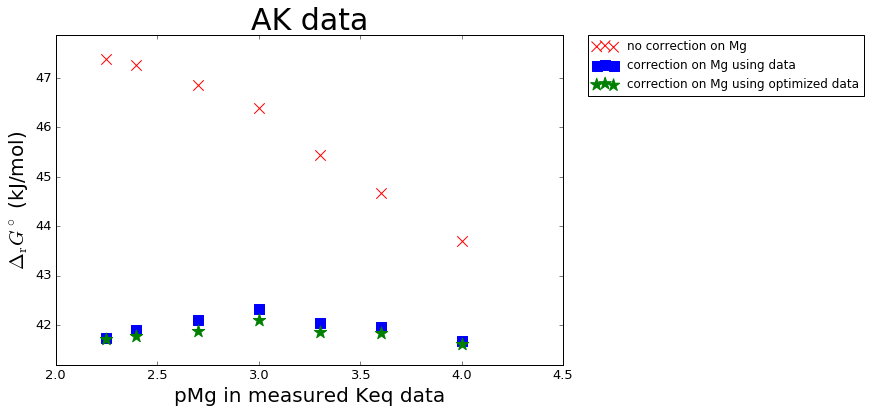

In [8]:
pK_optimize.compare_optm_results(AK_list)
plot_comparisons(pK_optimize.updated_pMg2plot, pK_optimize.updated_dGr0_no_Mg_corr, \
pK_optimize.updated_dGr0_w_original_val, pK_optimize.updated_dGr0_w_optimized_val, title = 'AK data')